# Exercise 2-2: Write your own code for the Mortality Notebook

In [2]:
import pandas as pd

## Get the long and wide DataFrames

In [3]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [4]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


# Work With the long DataFrame

## 5. Display the first five rows of the DataFrame 

In [5]:
mortality_data.head(5)


,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## 6. Change the name of the Death Rate column to Deaths/100K

In [6]:
mortality_data.rename(columns = {'Death Rate':'Deaths/100K'}, inplace = True)

In [7]:
mortality_data.head(5)

,Year,Age Group,Deaths/100K
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## 7. Access and display the first five rows of the Year and MeanCentered columns

In [8]:
mortality_data['MeanCentered'] = mortality_data['Deaths/100K'] - mortality_data['Deaths/100K'].mean()


In [9]:
mortality_data.head()

,Year,Age Group,Deaths/100K,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584
4,1904,1-4 Years,1591.5,1398.57584


In [10]:
mortality_data[["Year", "MeanCentered"]].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


## 8. Access and display the last six rows of data from 1915 through 1920

In [11]:
mortality_data.query('Year == 1915 or Year == 1916 or Year == 1917 or Year == 1918 or Year == 1919 or Year == 1920').tail(6)

,Year,Age Group,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


## 9. Access and display the Year and Deaths/100K for the age group 01-04 Years

In [12]:
mortality_data.columns = mortality_data.columns.str.replace(" ", "")

In [13]:
mortality_data.AgeGroup.replace(
    to_replace = ["1-4 Years"],
    value = ["01-04 Years"],
    inplace = True)

In [14]:
mortality_data.columns

Index(['Year', 'AgeGroup', 'Deaths/100K', 'MeanCentered'], dtype='object')

In [15]:
mortality_data.query('AgeGroup == "01-04 Years"')[["Year", "Deaths/100K"]].head()        

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5


## 10. Sort the DataFrame by the Deaths/100K column in descending sequence and display the results. Then modify the result that it shows the first and the last 3 rows of the result.

In [16]:
mortality_data.sort_values('Deaths/100K', ascending=False)

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
4,1904,01-04 Years,1591.5,1398.57584
6,1906,01-04 Years,1580.0,1387.07584
...,...,...,...,...
236,2017,5-9 Years,11.6,-181.32416
237,2018,5-9 Years,11.5,-181.42416
233,2014,5-9 Years,11.5,-181.42416
229,2010,5-9 Years,11.5,-181.42416


In [17]:
mortality_data.sort_values('Deaths/100K', ascending=False).head(3)

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584


In [18]:
mortality_data.sort_values('Deaths/100K', ascending=False).tail(3)

,Year,AgeGroup,Deaths/100K,MeanCentered
233,2014,5-9 Years,11.5,-181.42416
229,2010,5-9 Years,11.5,-181.42416
231,2012,5-9 Years,11.4,-181.52416


## 11. Calculate the median of all of the values of the Deaths/100K column

In [19]:
mortality_data['Deaths/100K'].median()

89.5

## 12. Group the data by Year, and calculate the sum of the Deaths/100K column

In [20]:
mortality_data.groupby('Year')['Deaths/100K'] \
    .agg(['sum'])

,sum
Year,
1900,3233.0
1901,2850.6
1902,2733.0
1903,2659.1
1904,2793.1
...,...
2014,95.0
2015,99.5
2016,103.3


## Work with the wide DataFrame

## 13. Display the first five rows of the DataFrame

In [21]:
mortality_wide.head(5)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## 14. Display the index information about the DataFrame

In [22]:
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

## 15.use the describe() method to display statistical information for the  numeric columns of the DataFrame.start by coding this statement without T property.then add T to show how the display changes.

In [23]:
mortality_wide.describe()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1959.000000,0.003832,0.001173,0.000938,0.001774
std,34.496377,0.005005,0.001275,0.000884,0.001384
min,1900.000000,0.000240,0.000114,0.000139,0.000448
25%,1929.500000,0.000507,0.000240,0.000272,0.000855
50%,1959.000000,0.001091,0.000484,0.000446,0.001069
75%,1988.500000,0.005773,0.001989,0.001589,0.002837
max,2018.000000,0.019838,0.004661,0.003751,0.007774


In [24]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.000000,1929.500000,1959.000000,1988.500000,2018.000000
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


## 16. Access and display just the Year and 01-04 Years column

In [25]:
mortality_wide[["Year","01-04 Years"]]

,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


## 17. Access and Display just the rows of the Years from 1915 through 1920

In [26]:
mortality_wide.loc[15:20]

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309
16,1916,0.011115,0.002824,0.002051,0.003558
17,1917,0.010660,0.002907,0.002189,0.003803
18,1918,0.015735,0.004479,0.003751,0.007774
19,1919,0.009280,0.003000,0.002364,0.004385
20,1920,0.009872,0.002952,0.002299,0.004029


## 18. Combine steps 16 and 17 into a single cell that accesses and displays the Year and 01-04 Years for the Years from 1915 through 1920

In [27]:
mortality_wide.iloc[15:21, 0:2]

,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


## 19. Aggregate the data for all numeric columns in each year, display the mean, median and sum for those columns

In [28]:
mortality_wide.groupby('Year').agg(['mean', 'median', 'sum'])

01-04 Years                     05-09 Years                      \
            mean    median       sum        mean    median       sum   
Year                                                                   
1900    0.019838  0.019838  0.019838    0.004661  0.004661  0.004661   
1901    0.016950  0.016950  0.016950    0.004276  0.004276  0.004276   
1902    0.016557  0.016557  0.016557    0.004033  0.004033  0.004033   
1903    0.015421  0.015421  0.015421    0.004147  0.004147  0.004147   
1904    0.015915  0.015915  0.015915    0.004250  0.004250  0.004250   
...          ...       ...       ...         ...       ...       ...   
2014    0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   
2015    0.000249  0.000249  0.000249    0.000117  0.000117  0.000117   
2016    0.000253  0.000253  0.000253    0.000122  0.000122  0.000122   
2017    0.000243  0.000243  0.000243    0.000116  0.000116  0.000116   
2018    0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   

     10-14 Years                     15-19 Years                      
            mean    median       sum        mean    median       sum  
Year                                                                  
1900    0.002983  0.002983  0.002983    0.004848  0.004848  0.004848  
1901    0.002736  0.002736  0.002736    0.004544  0.004544  0.004544  
1902    0.002525  0.002525  0.002525    0.004215  0.004215  0.004215  
1903    0.002682  0.002682  0.002682    0.004341  0.004341  0.004341  
1904    0.003052  0.003052  0.003052    0.004714  0.004714  0.004714  
...          ...       ...       ...         ...       ...       ...  
2014    0.000140  0.000140  0.000140    0.000455  0.000455  0.000455  
2015    0.000146  0.000146  0.000146    0.000483  0.000483  0.000483  
2016    0.000146  0.000146  0.000146    0.000512  0.000512  0.000512  
2017    0.000155  0.000155  0.000155    0.000515  0.000515  0.000515  
2018    0.000149  0.000149  0.000149    0.000492  0.000492  0.000492  

[119 rows x 12 columns]

## 20. Add a new column to DataFrame named TotalDeaths. The value of this column should be the sum of the values in each of the year range columns. Display the DataFrame with new column.

In [29]:
mortality_wide["TotalDeaths"] = mortality_wide["01-04 Years"] +  mortality_wide["05-09 Years"] +  mortality_wide["10-14 Years"] +  mortality_wide["15-19 Years"]

In [30]:
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,0.019838,0.004661,0.002983,0.004848,0.032330
1,1901,0.016950,0.004276,0.002736,0.004544,0.028506
2,1902,0.016557,0.004033,0.002525,0.004215,0.027330
3,1903,0.015421,0.004147,0.002682,0.004341,0.026591
4,1904,0.015915,0.004250,0.003052,0.004714,0.027931
...,...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455,0.000950
115,2015,0.000249,0.000117,0.000146,0.000483,0.000995
116,2016,0.000253,0.000122,0.000146,0.000512,0.001033
117,2017,0.000243,0.000116,0.000155,0.000515,0.001029


## 21. Creating a line plot that shows the total death rates by year

<AxesSubplot:>

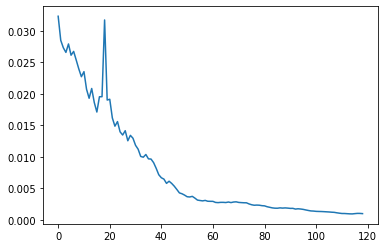

In [38]:
mortality_wide['TotalDeaths'].plot()